<center>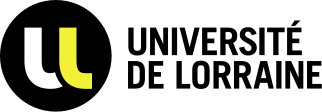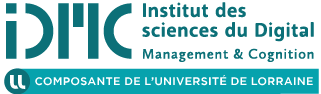</center>

<h1><center><strong><font color="Teal">Data Mining for Natural Language Processing<br/> Master 2 Natural Language Processing <br/> Lab 3 : Unsupervised Approaches to Explore Data</font></strong></center></h1>

<center>
<h3><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@univ-lorraine.fr</email>
<br/>
Year 2023-2024
</center>

<h3><center><font color="green"><strong>Student Version</strong></font></center></h3>

------------------------

# <font color="teal">**Usage (a.k.a. README)**</font>

This is a python notebook that we will use for the lab today. It is hosted by Google Colab to make it easy to share. You should be able to edit it, but your edits won't be saved, so I don't recommend it.


In order to work with it and answer the questions, you can either use it in Google Colab, download it and use it in VSCode (or other IDE) or Jupyter Notebook.

**Usage in Google Colab.** If you own a Google account, you can upload a copy of this file and edit it with saves. To do so got to "File" > "Save a copy in Drive". Don't forget to use the interactive Table of Content on the left panel.

**Local Usage.** You can download it either as a jupyter notebook (.ipynb) or as a python programme (.py) using the File>Download menu (Fichier>Télécharger in French). We recommend that you download it as a Jupyter Notebook to work on and edit on your own laptop.



## <font color="teal">"Quality of Life" Tips</font>

- To better understand when you need to do something, please for the 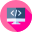 **TODO!** marks sprinkled across the lab!

- Run the small pieces of code (named Code Cells) below to see what they do (in Jupyter Notebook or Google Colab, press the small \"play\" button on the left, or press ctrl+enter in the code box)
- On Google Colab and VSCode, you can fold and unfold section and subsections to better display the notebook. Try to click on the arrow of this '"Quality of Life" Tips' section as below:
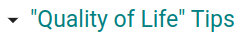

## <font color="teal">Install local python environnement</font>
At home you may want to use Python locally. Here are the steps:
1. Download the latest Python (Python3 not 2) from here: [https://www.python.org/downloads/](https://www.python.org/downloads/)
2. Install it (if you are using Ubuntu 16.04 you already have Python installed)

Start using it:
- Open terminal(unix/mac) or CommandLine(windows), type `python` to start an interactive python environnement
- Create a file named `my_super_program.py` and type `print('hello')` inside. Execute this file by typing `python3 my_super_program.py`.

To code you may need an IDE for smoother coding. I would suggest [Visual Studio Code](https://code.visualstudio.com/Download).

# <font color="teal">**Objectives**</font>

------------------------

In this lab you will actually use multiple approaches to represent the data in an unsupervised way. You will also learn how to use PyTorch and complete some parts of PyTorch code. For each approach you will plot the embbeding space.



# <font color="teal">**Preparation**</font>

### Download the corpora
(can also be manually downloaded here: https://gitlab.com/gguibon/idmc-storage/)

### Tweets.csv = [Twitter US Airline Sentiment dataset](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

```
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
```

### Political-media-DFE.csv = [Classification of Political Social Media dataset](https://data.world/crowdflower/classification-of-pol-social)

```
Contributors looked at thousands of social media messages from US Senators and other American politicians to classify their content. Messages were broken down into audience (national or the tweeter's constituency), bias (neutral/bipartisan, or biased/partisan), and finally tagged as the actual substance of the message itself (options ranged from informational, announcement of a media appearance, an attack on another candidate, etc.) Added: August 5, 2015 by CrowdFlower | Data Rows: 5000
```

In [ ]:
! wget https://gitlab.com/gguibon/idmc-storage/-/raw/main/tweets.csv
! wget https://gitlab.com/gguibon/idmc-storage/-/raw/main/Political-media-DFE.csv

Now let's import the Pandas module and load our datasets as Dataframes

In [ ]:
import pandas as pd
df_airline = pd.read_csv('tweets.csv')
df_pol = pd.read_csv('Political-media-DFE.csv', encoding='latin-1')

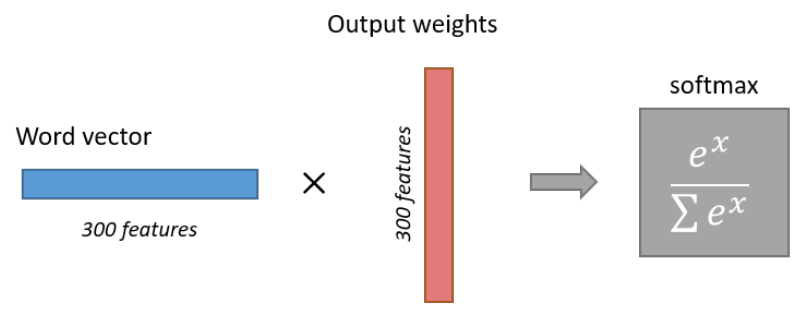

#### 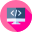 **TODO1: complete the preparation**

**Re train** pol (*i.e.* political) embeddings and **train** airline embeddings using **Word2Vec skip gram** (copied and pasted from lab session 2 correction) for later use

In [ ]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def remove_hashtags(tokens):
  # code me

def remove_url(tokens):
  # code me

def remove_html(tokens):
  # code me

from tqdm import tqdm
def tokenize_url_hashtags(corpus, tweets=False):
  # code me

cleaned_pol = tokenize_url_hashtags(df_pol.text.array, tweets=True)
cleaned_airline = tokenize_url_hashtags(df_airline.text.array, tweets=True)

print('number of pol:', len(cleaned_pol))
print('number of pol:', len(cleaned_airline))


from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the political W2V ...")
# code me

print("Training the airline W2V ...")
# code me

################################
### WARNING: depending on your options, the training can be quite long
################################




Explore the dataset.

Take a look at the columns:

In [ ]:
df_airline.columns

Take a look at the first tweet's `text` and `airline_sentiment` fields content.

Note: This tweets concern user sentiments related to different airline companies. Hence the column label!

(reminder: `iloc[0]` means *locate the element by index*, the index being 0 in this example)

In [ ]:
print('text =', df_airline.text.iloc[0], '| airline_sentiment =', df_airline.airline_sentiment.iloc[0])

text = @VirginAmerica What @dhepburn said. | airline_sentiment = neutral


Let's take a look at the dataframe first 5 elements:

In [ ]:
df_airline.head()

Now let's see what it's shape is: `(number_of_rows, number_of_columns)`

In [ ]:
df_airline.shape

(14640, 15)

Here you can find some code for exploring the dataset using unsupervised learning (clustering) and visualization. A good clustering would require better tuned features.

If you want to dive into the scikit learn related documentation:
- [CountVectorizer doc](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [preprocessing doc](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

#### 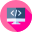 **TODO2: complete the following token to vector mapping**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import numpy as np

def tokens2vectors(tokenCorpus, trained_word2vec, dim=100):
  '''
  transforms our X into a list of list of vec (2D array)

  Args:
    tokenCorpus (list): corpus of tokens represented as a list of
      tokenized texts in which each token is separated by a space.

  Returns:
    Numpy array representing the 2D array of token embeddings from the word2vec
    model pre-trained using Gensim (here pol_wv for political_wordvectors)
  '''
  new_sample = list()
  for sample in tokenCorpus:
    tweetVecs = list()
    # complete me
  return np.array(new_sample)

# X = tokens2vectors(df_pol.loc[:, "text"], pol_wv)
X = tokens2vectors(df_airline.loc[:, "text"], airline_wv)

## If you want you can try with a CountVectorizer (token occurrence matrix)
# X = dfTweets.loc[:, "text"]
# cv = CountVectorizer(max_features=300)
# X = cv.fit_transform(X)
# print(X.shape)


# <font color="teal">**Explore Data Using Unsupervised Learning**</font>

Now let's train some KMeans clusetring with 3 target clusters (that we hope will represent positive, neutral and negative sentiments).

- [KMeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20, max_iter=300, verbose=0).fit(X)

#### 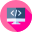 **TODO3:**

- predict the clusters
- display some clsuter related info
- complete the quantitative evaluation using the v_measure

In [ ]:
clusters = kmeans.predict(X)

from sklearn.cluster import KMeans

# use the model to predict clusters
# code me

# display some cluster related info
from collections import Counter
print('Clusters:', clusters, 'of type', type(clusters))
print('Here is the occurrence counts for each cluster:')
# code me
print('clusters distribution accross sentiments')
# code me
print(clusterTendancies)

print(df_airline.loc[:, "text"].shape, 'hey', clusters.shape)

# Quantitative evaluation
from sklearn.metrics.cluster import v_measure_score
# code me

We can see the clusters are not that good according to sentiment. The V-Measure score is very low (0-1 range)

This is not suprising considering this is unsupervised learning.

And see in which clusters the first two tweets are assigned:

In [ ]:
print('cluster =', clusters[0], '| text =', df_airline["text"][0], '| airline_sentiment =', df_airline["airline_sentiment"][0])

print('cluster =', clusters[1], '| text =', df_airline["text"][1], '| airline_sentiment =', df_airline["airline_sentiment"][1])

Let's do some **dimension reduction** using TSNE (alternatively you can use other methods: PCA, etc.).

Be aware: TSNE parameters highly affects the visualization which can then lead to opposite interpretations!

- [TSNE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=100.0, early_exaggeration=2., n_iter=250)
X_tsne = tsne.fit_transform(X)

Now we want to display a really pretty plot based on the reduced.

To do so we use the [Plotly library](https://plotly.com/):
- [plotly.express documentation](https://plotly.com/python/plotly-express/)
- [plotly.graph_objects documentation](https://plotly.com/python/graph-objects/)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


mapColors = {0:'lightseagreen', 1:'blueviolet', 2:'tomato'}
mapSentColors = {'positive':'lightseagreen', 'neutral':'blueviolet', 'negative':'tomato'}
colorsClusters = [mapColors[c] for c in clusters]
colorsSentiment = [mapSentColors[s] for s in df_airline.airline_sentiment]

fig = go.Figure(data=go.Scatter(
    x = X_tsne[:, 0],
    y = X_tsne[:, 1],
    hovertext = list(zip(df_airline.loc[:, "text"], df_airline.airline_sentiment)),
    mode='markers+text',
    marker=dict(
        size=4,
        color=colorsClusters, # colorsClusters or colorsSentiment
        colorscale='Viridis',
        showscale=True,
    )
))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

The clustering does not necessarily map tweets by their sentiment. To obtain better scores, try different parameters later on.

**Warning:** It takes a lot of time to recompute the whole Word2Vec + Kmeans + TSNE with better parameters! Do it later!

## <font color="teal">**Deep Learning in PyTorch image.png**</font>

## <font color="teal">Pytorch</font>
PyTorch is a Python based library for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients

Usages :
- It’s a Python-based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - a deep learning research platform that provides maximum flexibility and speed


# <font color="teal">**Pytorch basics**</font>

**NB** : Tensor are the basics block of pytorch. Tensor allows to store data (input data or target data) as well as the parameters (also called weights, neurons,...) of your neural network.


- tensor creation
- tensor types
- basic operations between tensors
- from and to numpy
- about GPU

In [ ]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

### <font color="teal">Tensors</font>
(image by [Matthew Mayo](https://www.kdnuggets.com/author/matt-mayo))

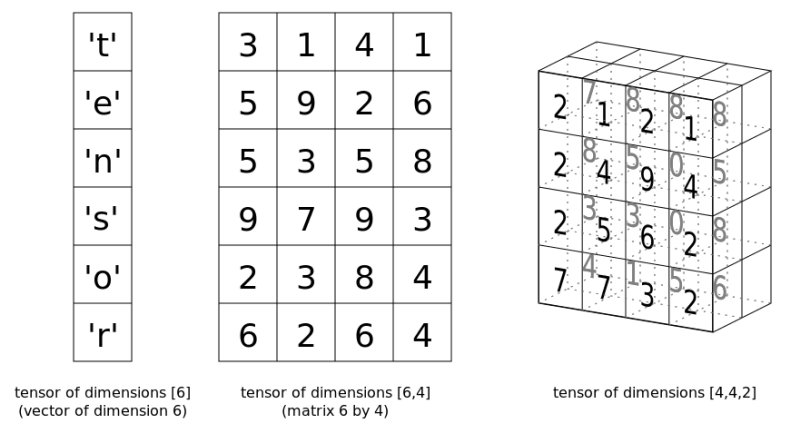

**What is a pytorch tensor ?** : A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

**How to define a pytorch tensor ?**
- using existing constructors : _torch.ones_ , _torch.zeros_ _torch.rand_
- based on existing object
    - from another tensor (or only using the shape of the other tensor)
    - from a python list
    - from a numpy array

In [ ]:
# define
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [ ]:
# other basic definition
print(torch.zeros(5,3), "\n",
      torch.rand(2,3), "\n",
      torch.empty(2,2))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0.6271, 0.1150, 0.0343],
        [0.5437, 0.9372, 0.8815]]) 
 tensor([[7.2663e-31, 0.0000e+00],
        [3.5032e-44, 0.0000e+00]])


In [ ]:
# from a python list
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array :
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

tensor([[[ 1.,  3.,  5.,  6.],
         [-1.,  4.,  4.,  4.]],

        [[-1., -3., -5., -6.],
         [10., -4., -4., -4.]]])
tensor([0, 1])


If the list is not a proprer matrix shape, an exception is returned!

Uncomment the following cell to view the **error prompt**

In [ ]:
# # list must be in a proper matrix shape
# ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4]]]
# torch.Tensor(ls)

**Basic manipulations**
- access type / change data types
- access elements
- reshape
- maths opertions : add, multiply , ..
- differentiate / derive
- set to a specific _device_ : GPU , GPU:0, GPU:1 , CPU ...

In [ ]:
# get type
print(tensor,tensor.dtype)
# change type
tensor = tensor.float()

tensor([0, 1]) torch.int64


**NB** : types are important in Deep Learning  because :
- some types are more memory consumming than others : e.g : float16 vs float32
- some operations require specific type (cf. Embedding layer ...)

In [ ]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

tensor([[[0.0782, 0.6794],
         [0.1224, 0.7358]],

        [[0.7522, 0.5692],
         [0.4536, 0.3193]],

        [[0.0153, 0.5071],
         [0.0925, 0.9361]],

        [[0.3915, 0.1805],
         [0.4026, 0.6179]],

        [[0.5668, 0.2697],
         [0.1263, 0.0476]]])
tensor(0.7358)
tensor([[0.0782, 0.6794],
        [0.7522, 0.5692],
        [0.0153, 0.5071]])


**NB** : pytorch tensor indexing exactly match numpy indexing

In [ ]:
# get the shape of a tensor
tensor.size()
# reshape it
print(tensor, "\n",
      tensor.view(2,2,5))

tensor([[[0.0782, 0.6794],
         [0.1224, 0.7358]],

        [[0.7522, 0.5692],
         [0.4536, 0.3193]],

        [[0.0153, 0.5071],
         [0.0925, 0.9361]],

        [[0.3915, 0.1805],
         [0.4026, 0.6179]],

        [[0.5668, 0.2697],
         [0.1263, 0.0476]]]) 
 tensor([[[0.0782, 0.6794, 0.1224, 0.7358, 0.7522],
         [0.5692, 0.4536, 0.3193, 0.0153, 0.5071]],

        [[0.0925, 0.9361, 0.3915, 0.1805, 0.4026],
         [0.6179, 0.5668, 0.2697, 0.1263, 0.0476]]])


In [ ]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.float32


tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)

### <font color="teal">All operations on tensors</font>
- all reshape
- squeeze
- sum , prod
- max, norm ...

❗**Beware of Broadcasting** ❗ issues if your tensors does not have the same size. As in [Numpy broadcasting](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules), some operations above can broadcast, i.e. extend, their application to the size of the targeted tensor.

One really good explanation about PyTorch specific broadcasting can be found here: https://stackoverflow.com/questions/51371070/how-does-pytorch-broadcasting-work

Let's take the same example and reproduce it here.



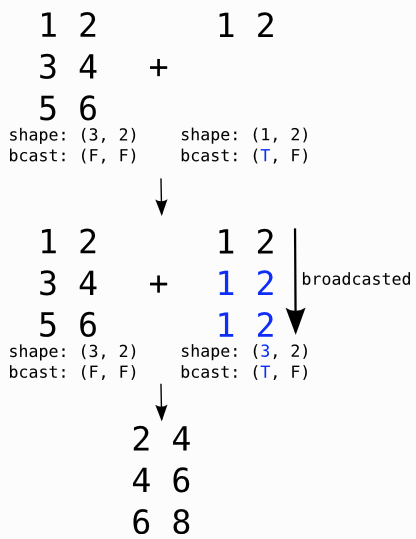

In PyTorch we reproduce it as follows:

In [ ]:
tensor_a = torch.Tensor([[1,2], [3,4], [5,6]])
tensor_b = torch.Tensor([1,2])
tensor_a + tensor_b

tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])

## <font color="teal">Automatic Differentiation</font>

The core component of any modern deep learning library is _Automatic Differentiation_.


**Recall**
- Training any deep learning model requires backpropagatation
- Backpropagation is an algorithm that efficiently computes the gradient of a neural network's output based on its input and with regard to all its parameters (or also named weights)

_Automatic Differentiation_ provides a way of automatically computing gradients of any function. In other words, _automatic differentiation_ gives you the possibility to build complex neural network without caring about computing the gradients by yourself.


**NB**

Having access to an open source library that performs Automatic Differentation (tensorflow/pytorch and before Dynet or Theano..) is one of the reasons for the popularity and sucess of Deep Learning today.

### <font color="teal">Automatic Differentiation in a nutshell</font>


**Definition**
Automatic differentiation refers to a general way of taking a program which computes a value, and automatically constructing a procedure for computing derivatives of that value.

Automatic Differentation requires 3 steps

1. Building a computation Graph
2. propagating inputs throughout the graph (forward pass)
3. Computing gradient of each of the node in the graph (backward pass)

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
# double checking if gradient
print("Checking gradient is set to {}. Its gradient is still {} ".format(x.requires_grad, x.grad))

Checking gradient is set to True. Its gradient is still None 


In [ ]:
# let us define a basic operation
y = x+1
print(y)

Do not fret due to the warning. It means that you are accessing the `.grad` field of a Tensor for which pytorch will never populate the `.grad` field.
This will not be the case later on.


In [ ]:
# y has now a gradient attribute , grad is none
y.grad_fn, y.grad

In [ ]:
z = y * y * 3
out = z.mean()
print('z = ', z)
print('out = ', out)
print('z and y grad = ', z.grad, y.grad)

In [ ]:
out.backward() # backpropagation
# Let's inspect the gradient at each previous variable' gradients now
print("Gradients with regard to intermediate nodes:", out.grad, z.grad, y.grad)
print("Gradients with regard to the input node that we considered to be the parameter:", x.grad)

In [ ]:
# to manipulate a tensor without its gradient
out.detach()

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print('x', x)
y = x+1
print('y', y)
# y.grad_fn, y.grad
z = y * y * 3
print('z', z)
out = z.mean()
print('out', out)
print('x grad', x.grad)
out.backward()
print('x grad', x.grad, x.grad.data, x.grad_fn)
print('y grad', y.grad, y.grad_fn)
print('z grad', z.grad, z.grad_fn)
print('out grad', out.grad, out.grad_fn)



In [ ]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

# Displaying
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\
    grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

In [ ]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient
print(x.grad.data) #Prints '3' which is dz/dx

## <font color="teal">Pytorch Model</font>

Our goal is to define a deep learning model, train it, make prediction with it and evaluate it.

With pytorch this means doing the three following "scripts" :
1. Defining the model
2. Implementing the prediction
3. Implementing the training loop
    - Defining a loss
    - Defining an optimizer
    - Loop :
        - forward pass
        - backward pass
        - applying optimization update rule
4. Evaluating the model / playing with it
    - You can use the training criteria (loss) as your evaluation score
    - You can use another score : accuracy, F1 , ...

### <font color="chillipepper">1. Defining the model</font>
Pytorch models always follow the same template :

- a class
- defining all layers (or parameters) in _init_()
- defining the forward pass in foward()

Let's see what it looks like with a simple 2 layers model.

All trivial Neural Network layers can generally be found in [torch.nn](https://pytorch.org/docs/stable/nn.html).

**Warning**: All your parametrized modules (Layers or any trainable vectors) must be defined as *direct* attributes to your ```nn.Module``` class so that the call to ```.backward()``` can properly propagate the gradients through everything. To define layers in list attribute, (resp. dictionary attributes) use ```ModuleList``` (resp. ```ModuleDict```).


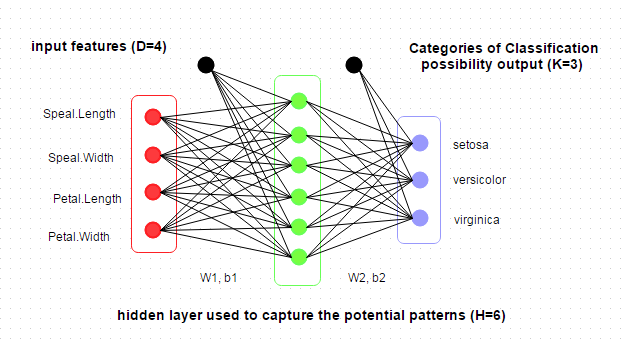



In [ ]:
# defining the model
class MinimalExampleModel(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MinimalExampleModel, self).__init__()
        # define a first linear layer with an input dimension (D_in) and a Hidden dimension (H)
        # linear layer documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.linear1 = torch.nn.Linear(D_in, H, bias=True)
        # define the final linear layer, often named classification layer as the output dimension (D_out) == the number of target classes
        self.linear2 = torch.nn.Linear(H, D_out, bias=True)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        # first apply the linear1 layer on the vector and encapsulate it with an activation function for non linearization. This creates a dense layer.
        # relu documentation: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
        h_relu = torch.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

### <font color="chillipepper">2. Forward pass</font>
1. instanciating the model
2. getting input data
3. computing the foward pass

In [ ]:
# instanciating the model with
# N:      batch size
# D_in:   input dimension
# H:      hidden dimension
# D_out:  output dimension
N, D_in, H, D_out = 2, 10, 10, 2

# Construct our model by instantiating the class defined above
# Note: all the parameters are initialized here
model = MinimalExampleModel(D_in, H, D_out)
# You can look up into the model
model

MinimalExampleModel(
  (linear1): Linear(in_features=10, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=2, bias=True)
)

In [ ]:
# let's use torchinfo to have a better insight of the model infos: https://github.com/TylerYep/torchinfo
from torchinfo import summary
dummy_input_size = (1, 10) # (batch_size, D_in)
summary(model, (N, D_in))

Layer (type:depth-idx)                   Output Shape              Param #
MinimalExampleModel                      --                        --
├─Linear: 1-1                            [2, 10]                   110
├─Linear: 1-2                            [2, 2]                    22
Total params: 132
Trainable params: 132
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
  print('DEVICE = ', colored(torch.cuda.get_device_name(0), "green" ) )
else:
  device = 'cpu'
  print('DEVICE = ', colored('CPU', "blue"))
model = model.to(device)

#model = MyModel(D_in, H, D_out)
# forward pass / predict x
y_pred = model(x.to(device)) # almost equivalent to model.forward(x)
# y_pred
y_pred

DEVICE =  CPU


tensor([[0.1285, 0.4602],
        [0.0665, 0.2716]], grad_fn=<AddmmBackward0>)

#### 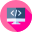 **TODO4! Think about it**
### <font color="chillipepper">Questions</font>
- Why do the prediction change if the model is re-instanciated ?
- Can this be a problem ?
- How to avoid it ?

# <font color="teal">**"Unsupervised" Learning using PyTorch for Data Exploration**</font>

## <font color="teal">**Installations**</font>

In [ ]:
! pip install datasets transformers torchinfo sacrebleu

In [ ]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from datasets import load_dataset
from tqdm import tqdm
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import pandas as pd
from termcolor import colored
from collections import Counter

from sacrebleu.metrics import BLEU

## <font color="teal">**Data Representation**</font>



We will use a corpus made of English-French translation pairs. This dataset comes from Tatoeba, https://tatoeba.org/fr/. You can find more datasets from this wbsite here: https://tatoeba.org/fr/downloads.

We will only consider English-French pairs, but you are free to try other pairs if you wish to do so.

Keep in mind this corpus is not the best one to train a good model, but machine translation model can be really long to train. Hence we chose this one to obtain quick, alas not good, results. You are free to try other datasets afterwards.

**Disclaimer:** The model should be trained for at least ~40 minutes to obtain somewhat "correct" results. Ideally, the model should be trained on the whole trainset, with multiple epochs. But we will NOT do this. You will see later on that with the `limit` option, we can easily select the subset size for training.

In [ ]:
! wget https://gitlab.com/gguibon/idmc-storage/-/raw/main/eng-fra.zip

! unzip eng-fra.zip

In [ ]:
from datasets import load_dataset
enfr = load_dataset('json', data_files='eng-fra.json')

Our dataset only has a "train" set

In [ ]:
enfr

In [ ]:
# the number of telements in the train set
len(enfr['train'])

In [ ]:
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<sos>', '<eos>']

Let's try a simple tokenization on one element of the corpus

In [ ]:
tok = TweetTokenizer()
entry = enfr['train'][2]['translation']
tokens = tok.tokenize(entry['fr'].lower().strip())
print(tokens)

### <font color="teal">Build a Vocabulary from Scratch</font>

#### 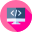 **TODO5: Count the vocab for both languages**



**Create your own vocab manually**, a dictionary `VOC` with multiple keys.
For each language `'en', 'fr'`:
- `counts`is the number of occurrence per token
- `stoi` is the String To Index mapping
- `itos` is the Index to String mapping
- `nbwords`is the global number of words




In [ ]:
# stoi string to index
# itos index to string

VOC = {'en': {'stoi': {}, 'counts': {}, 'nbwords': 0}, 'fr': {'stoi': {}, 'counts': {}, 'nbwords': 0}}
LANGS = ['fr', 'en']

def parse_entry(entry):
  # CODE ME!!

# now we add the special symbols
for lang in LANGS:
  for t in special_symbols:
    VOC[lang]['stoi'][t] = VOC[lang]['nbwords']
    VOC[lang]['counts'][t] = 1
    VOC[lang]['nbwords'] += 1

In [ ]:
for entry in tqdm(enfr['train']):
  parse_entry(entry)

# to compute the itos, we can just reverse the stoi
for lang in LANGS:
  VOC[lang]['itos'] = { v:k for k,v in VOC[lang]['stoi'].items()}

In [ ]:
print(VOC['fr']['itos'][1])

In [ ]:
print('fr', VOC['fr']['nbwords'], 'en', VOC['en']['nbwords'])

### <font color="teal">Add SOS and EOS special indices and Tokenize</font>



#### 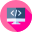 **TODO6: add SOS and EOS**

Add End of Sentence (EOS, `EOS_IDX`) and Start of Sentence (SOS, `SOS_IDX`) indices in the end and beginning of a list of tokens.

This means, for each `LANGS`, you will have to:
1. tokenize the sentence
2. transform the tokens to their corresponding indice
3. surround the tokens with the SOS and EOS indices

In [ ]:
print(VOC['fr']['stoi']['va'])

4


In [ ]:
enfr['train'][0]

{'translation': {'en': 'Go.', 'fr': 'Va !'}}

In [ ]:
def prepa(entry):
  res = {l:None for l in LANGS }
  for lang in LANGS:
    tokens_entries =  # code me
    res[lang] = tokens_entries
  return res
enfr['train'] = enfr['train'].map(lambda e: prepa(e), batched=True)

  0%|          | 0/136 [00:00<?, ?ba/s]

In [ ]:
## the following line would take the max len from the data (~60)
# maxlen = max([max([ len(e) for e in enfr['train']['en'] ]), max([ len(e) for e in enfr['train']['fr'] ]) ] )
## we will limit the maxlen to 10, in order to ease the computational process
maxlen = 10

### <font color="teal">Split into train, val, test</font>

Now let's split the dataset into train, val and test splits.

In [ ]:
from sklearn.model_selection import train_test_split
# we retrieve a list of indices (required for the .select() method of the hugging face dataset object - which is not a dictionary -)
indices = [i for i in range(len(enfr['train']))]
# use scikit learn to split the indices into subsets: ~67% train, ~16 % val, ~16% test
train_indices, other_indices, _, _ = train_test_split(indices, indices, test_size=0.33, random_state=42)
val_indices, test_indices, _, _ = train_test_split(other_indices, other_indices, test_size=0.5, random_state=42)

We now have the following sizes

In [ ]:
print(len(train_indices), len(val_indices), len(test_indices))

And now we can use the indices lists to create subsets

In [ ]:
enfr['validation'] = enfr['train'].select(val_indices)
enfr['test'] = enfr['train'].select(test_indices)
enfr['train'] = enfr['train'].select(train_indices)

Let's look at the result

In [ ]:
enfr

### <font color="teal">Dataset and Dataloader</font>

#### 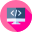 **TODO7: create the dataset and dataloaders**

You should know how to do it. We did it int the previous lab.

**Create the class** to serve the dataset items.

**Create the dataloaders** for each split. **Use batch_size to 1 !**

In [ ]:
from torch.utils.data import Dataset
import numpy as np

class EnfrDataset(Dataset):
    # CODE ME !!

In [ ]:
from torch.utils.data import DataLoader
# CODE ME !!

## <font color="teal">**The Model(s): Encoder Decoder**</font>

In this lab you will use an encoder-decoder for the same language... thus, an auto encoder 😃

### <font color="teal">CUDA, CPU, GPU, what is it?</font>

The GPU is the graphical processing unit, in order words: your graphic card. For computational purposes we mostly use Nvidia cards, which implements a dedicated language named CUDA. Hence, CUDA is available with all Nvidia cards such as the (impossible to get and overpriced) RTX 3090, Tesla, etc.

To enable GPU, please verify or change your execution parameters in "execution -> modify the execution type" and select "GPU".

Let's check our GPU

In [ ]:
# let's check our GPU if any
! nvidia-smi

You can see this GPU is a Tesla K80 with CUDA Versio 11.2. It possesses ~11 Gb of RAM and is used at 0% (because we did not start any training).

Now let's check our CPU:

In [ ]:
# let's check our CPU
! lscpu

You can see our CPU (i.e. the processor), is an Intel Xeon with 2.30GHz cadency. This is ok, not the best, and it is necessary to prefer the GPU for computational speed. PyTorch let's you handle CPU and GPU as you wishes.

In [ ]:
# torch.cuda.is_available() returns a boolean to check if the GPU can be used or not
if torch.cuda.is_available():
  # if CUDA is available set 'cuda' as the device
  device = 'cuda'
  # and then print the name of the GPU
  print('DEVICE = ', colored(torch.cuda.get_device_name(0), "green" ) )
else:
  # else, set 'cpu' as device
  device = 'cpu'
  # just print than the CPU is used. Alternatively you can check your CPU with the following command (linux based) in the next cell:
  # ! lscpu
  print('DEVICE = ', colored('CPU', "blue"))

### <font color="teal">Define the Encoder</font>

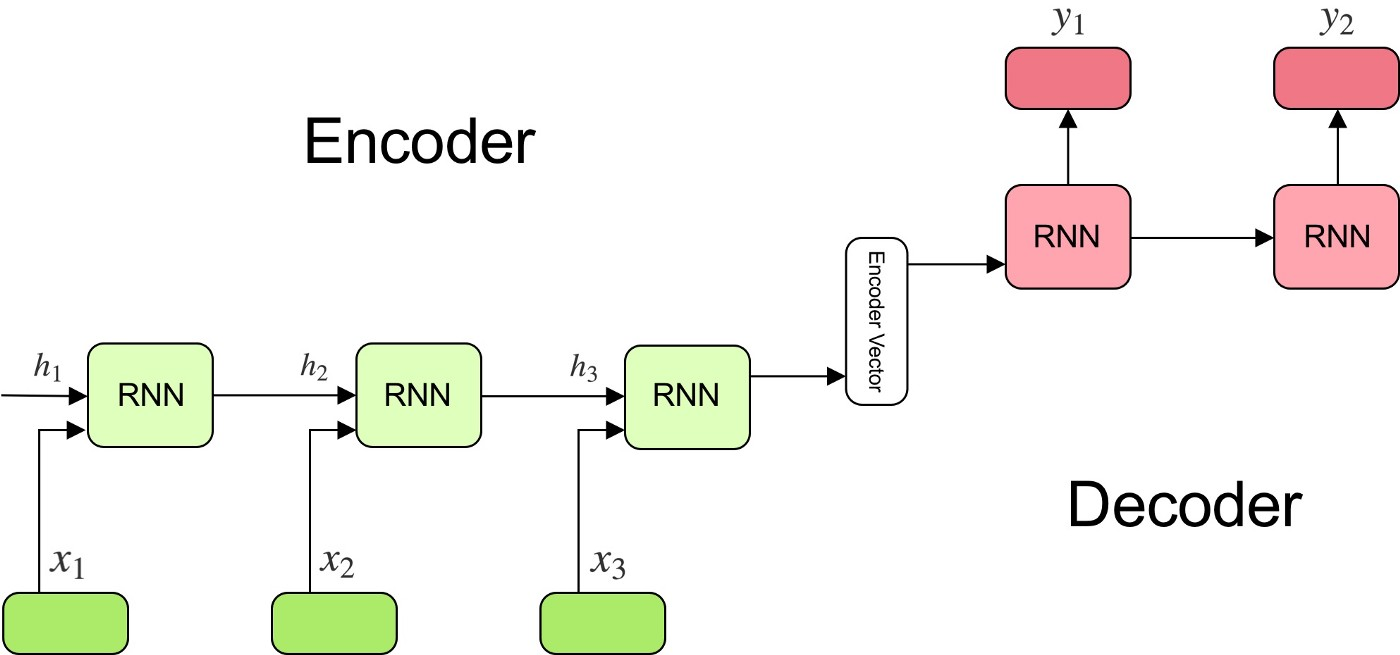

Source : https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346

The encoder will encode the input, i.e. transform it into a vector of information as follows (source: https://ichi.pro/fr/traduction-automatique-neuronale-utilisant-un-modele-de-sequence-a-sequence-24508576939223):

<img src="https://miro.medium.com/max/724/1*R-Ul_DUk74cj79bPr5UalQ.gif" />

We use a recurrent layer for this. However, LSTM are complex and difficult, and long to train on such very small dataset. This is why we will use the Gated Recurrent Unit here. This model has [been made in 2014 for machine translation](https://paperswithcode.com/paper/learning-phrase-representations-using-rnn). It can be summed up as a simpler version of LSTM.


Links:
- https://pytorch.org/docs/stable/generated/torch.nn.GRU.html



Gated_Recurrent_Unit,_type_1.svg

#### 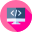 **TODO8: put the correct shape for the GRU layer**

Complete the following code (for both encoder and decoder) with the correct shape.

We pass an element at a time, but the GRU requires 3 dimensions.
Change the dimension of the embedded tensor using the `.view()` method.

Tips:
- https://pytorch.org/docs/stable/generated/torch.Tensor.view.html

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        # configurable hidden size
        self.hidden_size = hidden_size

        # we use an embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size)
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
      # move the input to the dedicated device (CPU or GPU)
      input = input.to(device)
      # apply the embedding layer
      embedded = self.embedding(input)


      # modify the output shape in order for it to work with a GRU (we use batches of one element)
      ############## CODE ME ###############
      output = # CODE ME, output should be of size (1, 1, hidden_size)


      # apply the GRU layer
      output, hidden = self.gru(output, hidden)
      # return both the output, and the hidden vector
      return output, hidden

    def initHidden(self):
        """
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)

### <font color="teal">Define the Decoder</font>

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        # configurable hidden size
        self.hidden_size = hidden_size

        # we use an embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size)
        # we define a GRU layer (Gated Recurrent Unit), a simpler version of recurrent layer and way simple than LSTM
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
      # move the input to the dedicated device (CPU or GPU)
        input = input.to(device)


        # apply the embedding layer and modify the output shape in order for it to work with a GRU (we use batches of one element)
        output = self.embedding(input)

        ################ CODE ME !! ####################
        output = # CODE ME !


        # apply a ReLU non linearization layer
        output = F.relu(output)
        # apply the GRU layer
        output, hidden = self.gru(output, hidden)
        # apply a softmax to get probabilities, on the first element of the output vector (batch is equal to one)
        output = self.softmax(self.out(output[0]))
        # return both the output probabilities and the hidden vector
        return output, hidden

    def initHidden(self):
        """
        method used to customize the hidden vector initialization.
        here the vector is initialized as 0 with the correct shape and created directly on the correct device
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)

### <font color="teal">Encoder-Decoder in the Training Loop</font>

In [ ]:
import random
teacher_forcing_ratio = 0.5


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=maxlen):
    # put both encoder and decoder into trainning mode
    encoder.train()
    decoder.train()

    # use our custom initialization of hidden vector
    encoder_hidden = encoder.initHidden()

    # remove the gradient to prevent gradient accumulation
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    # adapt the tensor sizes
    input_tensor = input_tensor.view(input_tensor.size(1), input_tensor.size(0)) #input_tensor.view(1,1,-1)
    target_tensor = target_tensor.view(target_tensor.size(1), target_tensor.size(0)) #target_tensor.view(1,1,-1)

    # keep the lengths in memory
    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    # prepare an empty output with the correct size and the correct device
    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    # init the loss to 0
    loss = 0

    # pass each token of the input_tensor to the encoder, then populate the output
    for ei in range(input_length):
      if ei >= maxlen: break
      encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
      encoder_outputs[ei] = encoder_output[0, 0]

    # now we consider the decoder input, which starts only with the SOS token
    decoder_input = torch.tensor([[SOS_IDX]], device=device)

    # share the hidden vector from encoder to the decoder
    decoder_hidden = encoder_hidden

    # add a condition to teacher forcing
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden)
            # apply the NLL loss
            loss += criterion(decoder_output.to(device), target_tensor[di].to(device))
            decoder_input = target_tensor[di]  # Teacher forcing

    else:
      # Without teacher forcing: use its own predictions as the next input
      for di in range(target_length):
          decoder_output, decoder_hidden = decoder(
              decoder_input, decoder_hidden)
          topv, topi = decoder_output.topk(1)
          decoder_input = topi.squeeze().detach()  # detach from history as input
          # compute the loss
          loss += criterion(decoder_output, target_tensor[di].to(device))
          # stop the iteration if the EOS token is predicted
          if decoder_input.item() == EOS_IDX:
              break

    # do the back propagation
    loss.backward()

    # notify each optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()

    # return the average loss
    return loss.item() / target_length

In [ ]:
def sentence2tensor(entry, lang):
  """
  Function to transform an entry sentence into its corresponding indices as a tensor.
  Needs to indicate the language to select the correct part of the vocabulary
  """
  indices = [SOS_IDX] + [ VOC[lang]['stoi'][t] if t in VOC[lang]['stoi'] else 0 for t in tok.tokenize(entry.lower().strip()) ] + [EOS_IDX]
  print(indices)
  return torch.tensor(indices)

def evaluate(encoder, decoder, sentence, input_lang, target_lang, max_length=maxlen, input_tensor=None, target_tensor=None, criterion=None):
    """
    function to evaluate a translation of one sentence
    """
    # we evaluate, so we don't need gradients -> torch.no_grad()
    with torch.no_grad():

        if target_tensor is None: target_length = 0
        else: target_length = target_tensor.size(0)

        encoder_hidden = encoder.initHidden()

        # this condition adapts the function to either use a sentence as input, or a tensor
        if input_tensor is None:
          input_tensor = sentence2tensor(sentence, input_lang)
          # adapts the decoding length, useful for validation or test
          decoding_length = max_length
        else:
          decoding_length = target_length

        input_length = input_tensor.size(0)

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        # iterate through the input length
        for ei in range(input_length):
            if ei >= maxlen: break
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_IDX]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []

        # init the loss (the loss is important is the cirterion is given - i.e. validation phase)
        loss = 0

        # iterate through decoding values, feeding the output for the next token until the condition or maximum lenght is reached
        for di in range(decoding_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == EOS_IDX:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(VOC[target_lang]['itos'][topi.item()])

            decoder_input = topi.squeeze().detach()

            if target_tensor != None and criterion is not None:
              loss += criterion(decoder_output.to(device), target_tensor[di].unsqueeze(0).to(device))
              if decoder_input.item() == EOS_IDX:
                break

        return decoded_words, loss

In [ ]:
def inference(target, loader, encoder, decoder, criterion, langorder, limit=0):
  """
  fucntion to apply the inference logic over multiple translation and return a score
  used for validation
  """
  encoder.eval()
  decoder.eval()
  loss_it, glue_it = list(), list()
  preds, trues = list(), list()

  total = loader.__len__()
  if limit > 0: total = limit

  # iterate through the loader, can be a validation or test loader
  for it, batch in tqdm(enumerate(loader), desc="%s:" % (target), total=total):

    if limit > 0 and it >= limit: break

    input_tensor = batch[langorder[0]].squeeze()
    target_tensor = batch[langorder[1]].squeeze()

    input_lang = langorder[0]
    target_lang = langorder[1]
    # dummy sentence because this function is used for validation, not on-demand test
    mock_sentence = "dummy sentence not used"

    # compute entry and target sentences as "real text"
    entry = [VOC[input_lang]['itos'][t] for t in input_tensor.tolist()]
    entry = ' '.join( [e for e in entry if e not in ['<pad>', '<sos>', '<eos>', '<EOS>']] )
    true =  [VOC[target_lang]['itos'][t] for t in target_tensor.tolist()]
    true = ' '.join( [r for r in true if r not in ['<pad>', '<sos>', '<eos>', '<EOS>']] )
    trues.append([true])

    pred, loss = evaluate(encoder, decoder, mock_sentence, input_lang, target_lang, input_tensor=input_tensor, target_tensor=target_tensor, criterion=criterion)
    pred = ' '.join( [ h for h in pred if h not in ['<pad>', '<sos>', '<eos>', '<EOS>'] ] )
    preds.append(pred)
    if criterion is not None:
      try:
        loss_it.append(loss.item())
      except: pass
    else: loss_it.append(loss)

  bleu = BLEU()
  bleu_score = bleu.corpus_score(preds, trues)

  loss_it_avg = sum(loss_it)/len(loss_it)

  print("%s : (%s %s) (%s %s)" % ( colored(target, 'blue'), colored('loss', 'cyan'), loss_it_avg, colored('blue', 'cyan'), bleu_score ))

  return trues, preds, loss_it_avg, loss_it, bleu_score

## <font color="teal">**Start Training 📉**</font>

In [ ]:
import torch.optim as optim

def run_epochs(encoder, decoder, max_epochs, learning_rate=0.01, langorder=['en','fr'], limit=0):

    # define the optimizer for both encoder and decoder separately.
    # You can change it later on
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    epoch_losses = []
    val_epoch_losses = []

    for ep in range(max_epochs):

      # TRAINING
      it_losses = []

      total = train_loader.__len__()
      # allow to limit the number of random samples per epoch
      if limit > 0: total = limit

      for iter, batch in tqdm(enumerate(train_loader), desc="Epoch %s:" % (ep), total=total):
          # trigger the limit if it is set
          if limit > 0 and iter >= limit: break

          input_tensor = batch[langorder[0]]
          target_tensor = batch[langorder[1]]

          loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
          it_losses.append(loss)

      epoch_loss = sum(it_losses)/len(it_losses)
      epoch_losses.append(epoch_loss)
      print("Epoch %s : %s : (%s %s) " % (colored(str(ep), 'blue'), colored('Training', 'blue'), colored('loss', 'cyan'), epoch_loss  ))


      # VALIDATION
      trues, preds, val_loss_it_avg, val_loss_it, bleu_score = inference("validation", val_loader, encoder, decoder, criterion, langorder, limit=limit)
      val_epoch_losses.append(val_loss_it_avg)


    return epoch_losses, val_epoch_losses

In [ ]:
# the hidden size is up to you, higher value yields longer training time
hidden_size = 512
langorder = ['en', 'en']
epochs = 10

# instanciate the encoder
encoder1 = EncoderRNN(VOC[langorder[0]]['nbwords'], hidden_size).to(device)
# instanciate the decoder
decoder1 = DecoderRNN(hidden_size, VOC[langorder[1]]['nbwords']).to(device)

# run the epochs
loss_list, val_loss_list = run_epochs(encoder1, decoder1, epochs, learning_rate=0.01, limit=200, langorder=langorder)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_loss(loss_list):
  '''
  this function creates a plot. a simple curve showing the different values at each steps.
  Here we use it to plot the loss so we named it plot_loss, but the same function with different titles could be used to plot accuracies
  or other metrics for instance.

  Args:
    loss_list (list of floats): list of numerical values
  '''
  plt.plot(range(len(loss_list)), loss_list)
  plt.xlabel('epochs')
  plt.ylabel('NLL')
  plt.title('lr: {}, optim_alg:{}'.format(0.01, 'SGD'))
  plt.show()

In [ ]:
# train loss
plot_loss(loss_list)

In [ ]:
# val loss
plot_loss(val_loss_list)

What would be the pros and cons of using batches?
- padding would break the performances
- left or right padding and trim would generate noisy data (missing data) in the temporal representation

## <font color="teal">**Evaluations 📊**</font>

### <font color="teal">Evaluate on Test 📊</font>

#### 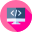 ☑️ **TODO9: Evaluate the model on the testset**

We use the BLEU score to evaluate our translation.

Here is the original paper: https://aclanthology.org/P02-1040.pdf

In [ ]:
# code me

## <font color="teal">**Visualization**</font>

#### 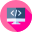 ☑️ **TODO10: Encode all the airline texts**

In [ ]:
def encode(encoder, sentence, input_lang, target_lang, max_length=maxlen, input_tensor=None, target_tensor=None):
    """
    function to only encode the sentence and return its vector
    it is a variant of the evaluate() function
    """
    # we evaluate, so we don't need gradients -> torch.no_grad()
    with torch.no_grad():

      # code me


#### 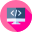 ☑️ **TODO11: Visualize the embedding space**

Use the part one function and the encode() function to visualize the embedding space using the auto encoder! 😀

In [ ]:
# code me